# Question:

- Which Programming Language have been picked the most among Professionals?
- How These group of professional are doing in terms of: ( Professionals who picked JavaScript language, how are they doing in terms of:
		a. Career satisfaction 
		b. Job satisfaction 
		c. Salary 
        
- What programming language to watch out for depending on these professionals choice ?


# Intialization Part

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import ImputingValues as t
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns', 500)


df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

df['HaveWorkedLanguage'] = df['HaveWorkedLanguage'].str.replace(re.escape('C++'),'CPlusPlus')

In [26]:
# Taking what we are interested to answer our 3 questions
df = df[['Respondent','Professional','CareerSatisfaction','JobSatisfaction','Salary','HaveWorkedLanguage','WantWorkLanguage']]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 7 columns):
Respondent            19102 non-null int64
Professional          19102 non-null object
CareerSatisfaction    16102 non-null float64
JobSatisfaction       15253 non-null float64
Salary                5009 non-null float64
HaveWorkedLanguage    13526 non-null object
WantWorkLanguage      12523 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 1.0+ MB


# Question 1

In [28]:
df2= df.set_index('Respondent')

In [29]:
df2 = df2[df2['Professional']=='Professional developer']

In [30]:
# Extract all programming languges in the field "HaveWorkedLanguage" and trasfer them into rows
unnested_lst = []
for col in ['HaveWorkedLanguage']:
    unnested_lst.append(df2[col].str.split(';').apply(pd.Series).stack())
result = pd.concat(unnested_lst, axis=1, keys=['ProgramLanguage'])

In [31]:
result.reset_index(inplace=True)

In [35]:
result['ProgramLanguage'] = result['ProgramLanguage'].apply(lambda x:x.strip())

In [36]:
result_rank2 = result['ProgramLanguage'].value_counts()

No handles with labels found to put in legend.


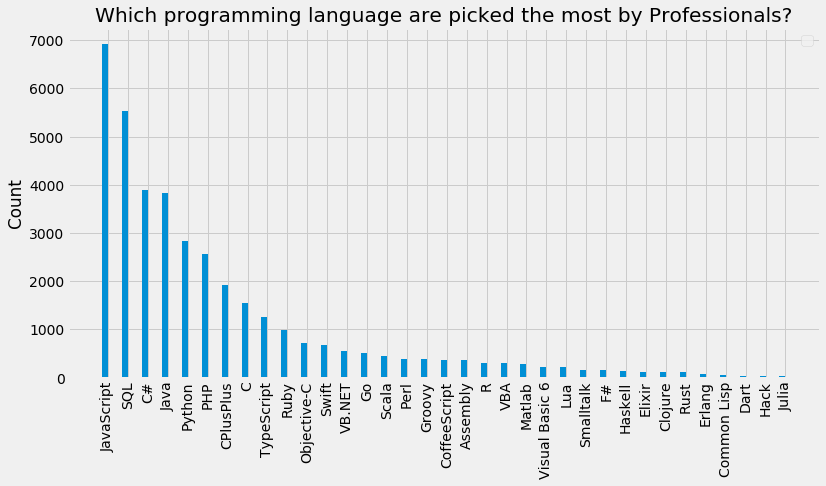

In [37]:
# Ploting 
plt.style.use('fivethirtyeight')
ind = np.arange(len(result_rank2))  # the x locations for the groups
width = 0.3  # the width of the bars
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(ind - width/2, result_rank2, width)


ax.set_ylabel('Count')
ax.set_title('Which programming language are picked the most by Professionals?')
ax.set_xticks(ind)
ax.set_xticklabels(result_rank2.index)
plt.xticks(rotation=90)
ax.legend()


# Question 2

In [38]:
professional_list_js = result[result['ProgramLanguage']=='JavaScript']['Respondent'].tolist()

In [39]:
df_prof_js = df2.loc[professional_list_js]

Text(0.5,0,'')

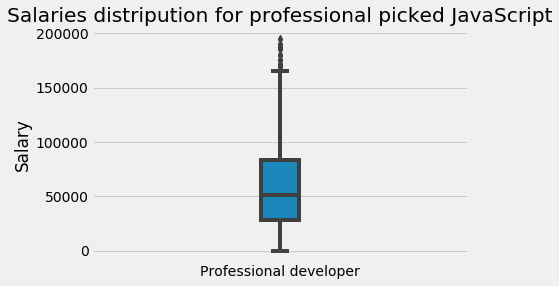

In [40]:
salary = df_prof_js.dropna(subset=['Salary'])
ax = sns.boxplot(x='Professional',y='Salary',data=salary,width=0.1)
ax.set_title('Salaries distripution for professional picked JavaScript')
ax.set_ylabel('Salary')
ax.set_xlabel('')

In [41]:
job_sata = df_prof_js.dropna(subset=['CareerSatisfaction','JobSatisfaction'])

Text(0.5,0,'')

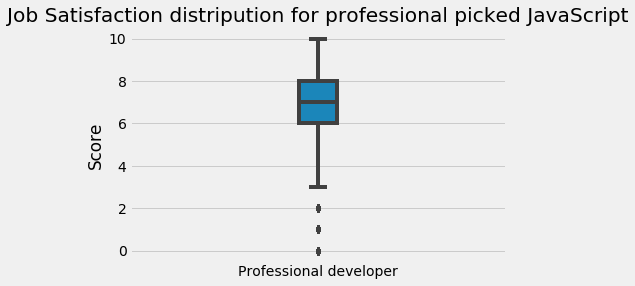

In [42]:
ax = sns.boxplot(x='Professional',y='JobSatisfaction',data=job_sata,width=0.1)
ax.set_title('Job Satisfaction distripution for professional picked JavaScript')
ax.set_ylabel('Score')
ax.set_xlabel('')

Text(0.5,0,'')

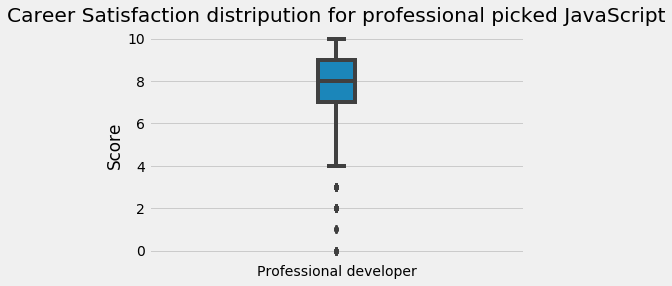

In [43]:
ax = sns.boxplot(x='Professional',y='CareerSatisfaction',data=job_sata,width=0.1)
ax.set_title('Career Satisfaction distripution for professional picked JavaScript')
ax.set_ylabel('Score')
ax.set_xlabel('')

# Question 3

In [44]:
# Extract all programming languges in the field "WantWorkLanguage" and trasfer them into rows
unnested_lst = []
for col in ['WantWorkLanguage']:
    unnested_lst.append(df_prof_js[col].str.split(';').apply(pd.Series).stack())
result = pd.concat(unnested_lst, axis=1, keys=['WantToLearn'])

In [45]:
result.reset_index(inplace=True)

In [46]:
result['WantToLearn'] = result['WantToLearn'].apply(lambda x:x.strip())

In [47]:
result_rank = result['WantToLearn'].value_counts()

No handles with labels found to put in legend.


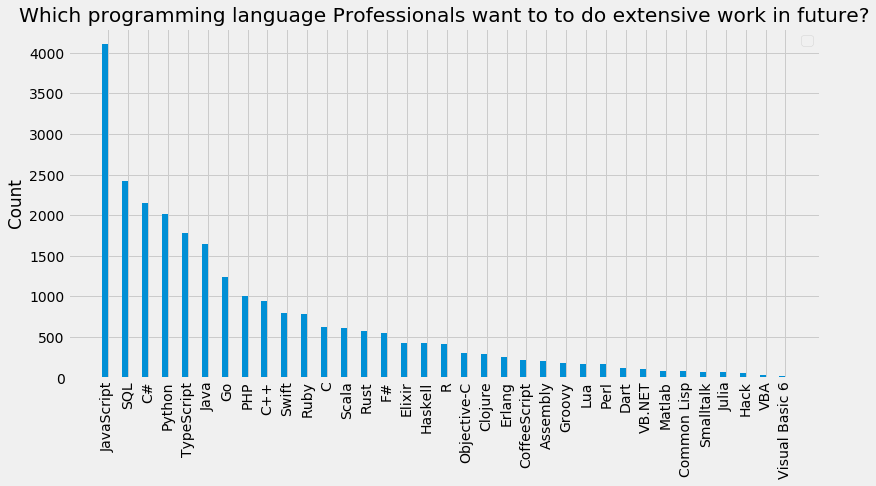

In [48]:
plt.style.use('fivethirtyeight')
ind = np.arange(len(result_rank))  # the x locations for the groups
width = 0.3  # the width of the bars
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(ind - width/2, result_rank, width)


ax.set_ylabel('Count')
ax.set_title('Which programming language Professionals want to to do extensive work in future?')
ax.set_xticks(ind)
ax.set_xticklabels(result_rank.index)
plt.xticks(rotation=90)
ax.legend()